In [1]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display HTML
from IPython.display import Image
from IPython.core.display import HTML 

# Validation
from sklearn.model_selection import train_test_split

#
from sklearn.feature_selection import mutual_info_classif

In [ ]:
from sklearn.datasets import make_classification, load_breast_cancer

X, y = load_breast_cancer(return_X_y = True, as_frame=True)
X.head()
y

In [ ]:
# from sklearn.datasets import load_boston

# # load data
# boston = load_boston()
# X = pd.DataFrame(boston.data, columns=boston.feature_names)
# X.drop('CHAS', axis=1, inplace=True)
# y = pd.Series(boston.target, name='MEDV')

# # inspect data
# X.head()

In [ ]:
# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

In [ ]:
Image(
    url="https://machinelearningmastery.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png"
)

In [ ]:
# Image(
#     url="https://machinelearningmastery.com/wp-content/uploads/2020/06/Overview-of-Data-Variable-Types2.png"
# )

In [ ]:
Image(
    url="https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png"
)

In [ ]:
Image(
    url="https://miro.medium.com/max/1250/1*b645U4bvSqa2L3m88hkEVQ.png"
)

In [ ]:
Image(
    url="https://miro.medium.com/max/1290/0*TD6Tf326AV9N9dCY.png"
)

# Statistical Tests for Feature Information (Filter-Based Feature Selection)

In [4]:
# example of chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from matplotlib import pyplot

In [ ]:
# placeholder for all functions

## Gather Feature Information

## Select K-best

### Regression Feature Selection: (Numerical Input, Numerical Output)

In [ ]:
Pearson’s correlation coefficient (linear).
Spearman’s rank coefficient (nonlinear)

In [ ]:
Pearson’s Correlation Coefficient: f_regression()
Mutual Information: mutual_info_regression()

### Classification Feature Selection: (Numerical Input, Categorical Output)

#### ANOVA correlation coefficient (linear): numerical feature to categorical target

In [102]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [111]:
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y
 
# feature selection
def select_anova_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [112]:
filename = 'data/pima-indians-diabetes.csv'

In [113]:
# load the dataset
X, y = load_dataset(filename)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Feature 0: 16.527385
Feature 1: 131.325562
Feature 2: 0.042371
Feature 3: 1.415216
Feature 4: 12.778966
Feature 5: 49.209523
Feature 6: 13.377142
Feature 7: 25.126440


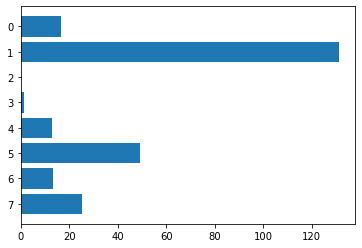

In [114]:
# feature selection
X_train_fs, X_test_fs, fs = select_anova_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
pyplot.barh([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.gca().invert_yaxis()

Feature 0: 0.000055
Feature 1: 0.000000
Feature 2: 0.836996
Feature 3: 0.234744
Feature 4: 0.000384
Feature 5: 0.000000
Feature 6: 0.000281
Feature 7: 0.000001


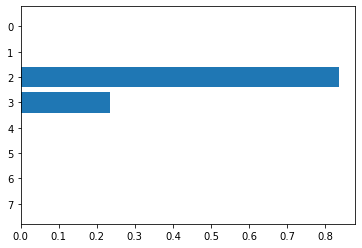

In [115]:
# feature selection
X_train_fs, X_test_fs, fs = select_anova_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.pvalues_[i]))
    
# plot the scores
pyplot.barh([i for i in range(len(fs.pvalues_))], fs.pvalues_)
pyplot.gca().invert_yaxis()

In [148]:
# load the dataset
def load_anova_dataset(filename, target, cols_to_use_for_anova=None):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename)
    # split into input (X) and output (y) variables
    X_df = data.drop(target, axis=1)
    y = data[target]
    # retrieve numpy array
    X = X_df.values
    y = y.values
    return X, y

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# feature selection
def select_anova_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [149]:
filename = "data/breast-cancer/breast-cancer_numeric.csv"
target = "diagnosis"
# cols_to_use_for_anova = ['']

In [152]:
X_y_df = pd.read_csv(filename)
X_y_df.head()

X_df = X_y_df.drop(target, axis=1)
y = X_y_df[target]

X_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [156]:
X_df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

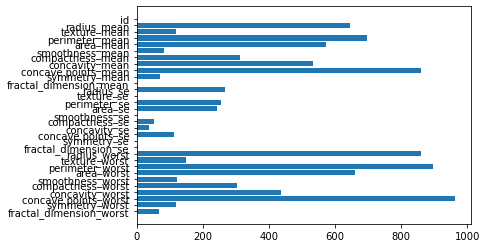

In [192]:
f_statistic, p_values = f_classif(X_df, y)

# plot the scores
pyplot.barh(X_df.columns, f_statistic)
pyplot.gca().invert_yaxis()

In [191]:
dfscores = pd.DataFrame(f_statistic)
dfcolumns = pd.DataFrame(X_df.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['feature','f_statistic']
featureScores

,feature,f_statistic
0,id,0.898150
1,radius_mean,646.981021
2,texture_mean,118.096059
3,perimeter_mean,697.235272
4,area_mean,573.060747
5,smoothness_mean,83.651123
6,compactness_mean,313.233079
7,concavity_mean,533.793126
8,concave points_mean,861.676020
9,symmetry_mean,69.527444


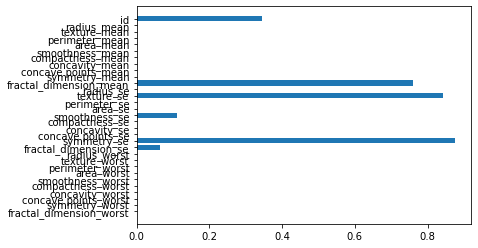

In [179]:
f_statistic, p_values = f_classif(X_df, y)

list(zip(X_df.columns, p_values))

# plot the scores
pyplot.barh(X_df.columns, p_values)
pyplot.gca().invert_yaxis()

In [85]:
X, y = load_anova_dataset(filename, target=target)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# prepare target data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

ANOVA scores
(xxxx): 

id: 0.321672
radius_mean: 490.196564
texture_mean: 92.200936
perimeter_mean: 519.087945
area_mean: 416.020744
smoothness_mean: 45.425277
compactness_mean: 230.825282
concavity_mean: 371.882298
concave points_mean: 568.580445
symmetry_mean: 46.858816
fractal_dimension_mean: 1.793413
radius_se: 164.873456
texture_se: 0.043966
perimeter_se: 158.790681
area_se: 148.443311
smoothness_se: 3.010053
compactness_se: 36.437812
concavity_se: 29.112442
concave points_se: 77.148681
symmetry_se: 1.277278
fractal_dimension_se: 0.827162
radius_worst: 622.155075
texture_worst: 111.100090
perimeter_worst: 650.611357
area_worst: 463.762787
smoothness_worst: 75.623737
compactness_worst: 230.141420
concavity_worst: 363.801411
concave points_worst: 739.964922
symmetry_worst: 85.641553
fractal_dimension_worst: 40.680181


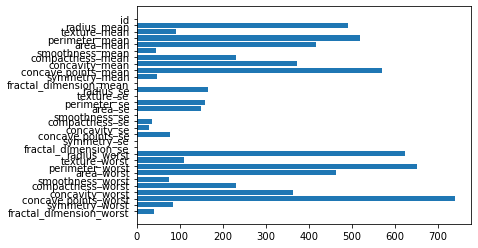

In [86]:
# feature selection
X_train_fs, X_test_fs, fs = select_anova_features(X_train, y_train_enc, X_test)

print("ANOVA scores")
print("(xxxx):", "\n")

for col, fs_score in list(zip(X_df.columns, fs.scores_)):
    print('%s: %f' % (col, fs_score))
    
# plot the scores
pyplot.barh(X_df.columns, fs.scores_)
pyplot.gca().invert_yaxis()

p-values
(below 0.05 means can reject null hypthesis of no relationship with target; therefore can keep feature for model): 

id: 0.570940
radius_mean: 0.000000
texture_mean: 0.000000
perimeter_mean: 0.000000
area_mean: 0.000000
smoothness_mean: 0.000000
compactness_mean: 0.000000
concavity_mean: 0.000000
concave points_mean: 0.000000
symmetry_mean: 0.000000
fractal_dimension_mean: 0.181313
radius_se: 0.000000
texture_se: 0.834029
perimeter_se: 0.000000
area_se: 0.000000
smoothness_se: 0.083562
compactness_se: 0.000000
concavity_se: 0.000000
concave points_se: 0.000000
symmetry_se: 0.259120
fractal_dimension_se: 0.363673
radius_worst: 0.000000
texture_worst: 0.000000
perimeter_worst: 0.000000
area_worst: 0.000000
smoothness_worst: 0.000000
compactness_worst: 0.000000
concavity_worst: 0.000000
concave points_worst: 0.000000
symmetry_worst: 0.000000
fractal_dimension_worst: 0.000000


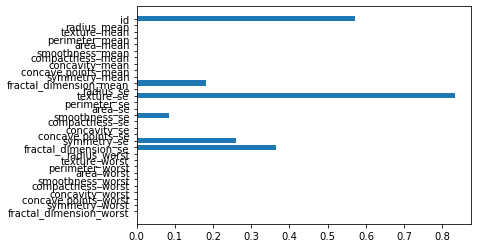

In [89]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train_enc, X_test)

print("p-values")
print("(below 0.05 means can reject null hypthesis of no relationship with target; therefore can keep feature for model):", "\n")

for col, fs_pvalue in list(zip(X_df.columns, fs.pvalues_)):
    print('%s: %f' % (col, fs_pvalue))
    
# plot the scores
pyplot.barh(X_df.columns, fs.pvalues_)
pyplot.gca().invert_yaxis()

### Kendall’s rank coefficient (nonlinear).: numerical feature to categorical target

### Mutual Information (MI): numerical feature to categorical target

In [90]:
from sklearn.datasets import make_classification, load_breast_cancer

X, y = load_breast_cancer(return_X_y = True, as_frame=True)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [91]:
# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

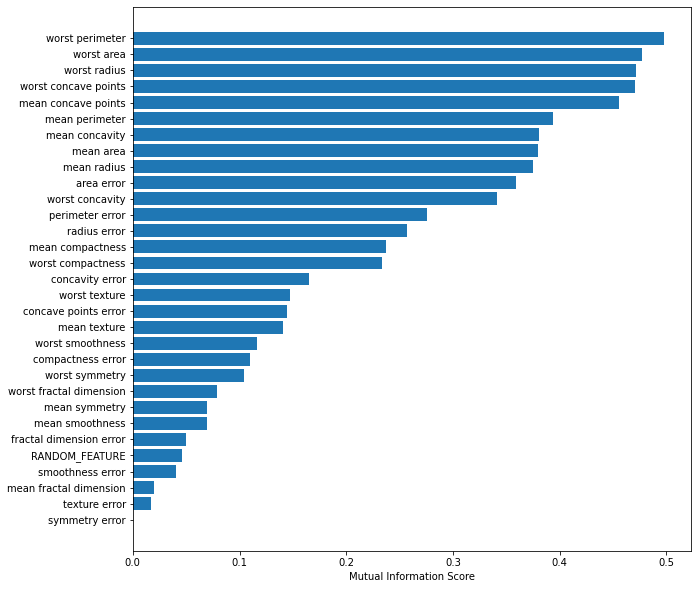

In [93]:
# Mutual Information: mutual_info_classif() 
    
###
data = X_train.copy()
data['RANDOM_FEATURE'] = np.random.randint(1, 5)
target = y_train
###

mi_score = mutual_info_classif(
    data, 
    target, 
    n_neighbors=10,
    random_state=22
)

sorted_idx = np.argsort(mi_score)

mi_scoredf = pd.DataFrame(
    mi_score[sorted_idx[::-1]], 
    index=data.columns[sorted_idx[::-1]], 
    columns=['mi_score'])

plt.figure(figsize=(10, 10))

plt.barh(
    data.columns[sorted_idx], 
    mi_score[sorted_idx]
)
plt.xlabel("Mutual Information Score");

## Classification Feature Selection: (Categorical Input, Categorical Output)

### Chi-Squared test (contingency tables): categorical feature to categorical target

In [68]:
# load the dataset
def load_chi2_dataset(filename, target, cols_to_use_for_chi2=None):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename)
    # split into input (X) and output (y) variables
    X_df = data.drop(target, axis=1)
    y = data[target]
    # retrieve numpy array
    dataset = data.values
    # retrieve numpy array
    X = X_df.values
    y = y.values
    # format all fields as string
    X = X.astype(str)
    return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_chi2_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [116]:
filename = "data/breast-cancer/breast-cancer_categorical_new.csv"
target = "Class"

In [117]:
X_y_df = pd.read_csv(filename)

X_df = X_y_df.drop(target, axis=1)
y = X_y_df[target]

X_y_df.head()
# X_df.head()
# X.columns

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [135]:
#Getting all the categorical columns except the target
categorical_columns = (
    X_y_df.select_dtypes(exclude = 'number')
    .drop(target, axis = 1)
    .columns
)

categorical_columns

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [76]:
# load the dataset
X, y = load_chi2_dataset(filename, target)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare target data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

chi2 scores
(higher means more of a relationship with target; therefore can keep feature for model): 

age: 0.472553
menopause: 0.029193
tumor-size: 2.137658
inv-nodes: 29.381059
node-caps: 8.222601
deg-malig: 8.100183
breast: 1.273822
breast-quad: 0.950682
irradiat: 3.699989


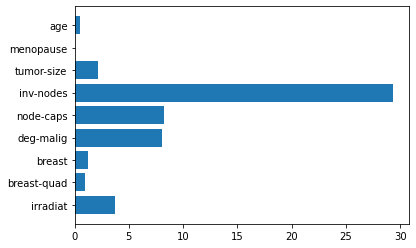

In [77]:
# feature selection
X_train_fs, X_test_fs, fs = select_chi2_features(X_train_enc, y_train_enc, X_test_enc)

print("chi2 scores")
print("(higher means more of a relationship with target; therefore can keep feature for model):", "\n")

for col, fs_score in list(zip(X_df.columns, fs.scores_)):
    print('%s: %f' % (col, fs_score))
    
# plot the scores
pyplot.barh(X_df.columns, fs.scores_)
pyplot.gca().invert_yaxis()

p-values
(below 0.05 means can reject null hypthesis of no relationship with target; therefore can keep feature for model): 

age: 0.491815
menopause: 0.864335
tumor-size: 0.143721
inv-nodes: 0.000000
node-caps: 0.004137
deg-malig: 0.004426
breast: 0.259051
breast-quad: 0.329546
irradiat: 0.054413


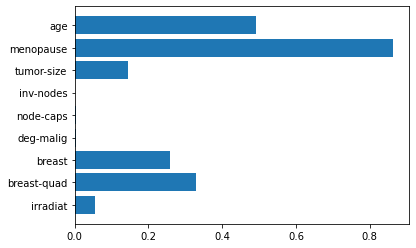

In [78]:
# feature selection
X_train_fs, X_test_fs, fs = select_chi2_features(X_train_enc, y_train_enc, X_test_enc)

print("p-values")
print("(below 0.05 means can reject null hypthesis of no relationship with target; therefore can keep feature for model):", "\n")

for col, fs_pvalue in list(zip(X_df.columns, fs.pvalues_)):
    print('%s: %f' % (col, fs_pvalue))
    
# plot the scores
pyplot.barh(X_df.columns, fs.pvalues_)
pyplot.gca().invert_yaxis()

In [137]:
# Import the function
from scipy.stats import chi2_contingency

In [138]:
X_y_df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [139]:
categorical_columns

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [140]:
chi2_check = []

for i in categorical_columns:
    if chi2_contingency(pd.crosstab(X_y_df[target], X_y_df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
        
res = pd.DataFrame(data = [categorical_columns, chi2_check]).T 

res.columns = ['Column', 'Hypothesis']
print(res)

        Column                      Hypothesis
0          age  Fail to Reject Null Hypothesis
1    menopause  Fail to Reject Null Hypothesis
2   tumor-size  Fail to Reject Null Hypothesis
3    inv-nodes          Reject Null Hypothesis
4    node-caps          Reject Null Hypothesis
5    deg-malig          Reject Null Hypothesis
6       breast  Fail to Reject Null Hypothesis
7  breast-quad  Fail to Reject Null Hypothesis
8     irradiat          Reject Null Hypothesis


In [141]:
check = {}

for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(X_y_df[i])
    bon_p_value = 0.05/X_y_df[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(X_y_df[target], dummies[series]))[1] < bon_p_value:
            check['{}-{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
res_chi_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

,Pair,Hypothesis
0,inv-nodes-'0-2',Reject Null Hypothesis
1,inv-nodes-'12-14',Fail to Reject Null Hypothesis
2,inv-nodes-'15-17',Fail to Reject Null Hypothesis
3,inv-nodes-'24-26',Fail to Reject Null Hypothesis
4,inv-nodes-'3-5',Fail to Reject Null Hypothesis
5,inv-nodes-'6-8',Fail to Reject Null Hypothesis
6,inv-nodes-'9-11',Fail to Reject Null Hypothesis
7,node-caps-'no',Reject Null Hypothesis
8,node-caps-'yes',Reject Null Hypothesis
9,deg-malig-'1',Reject Null Hypothesis


In [147]:
chi2_keep_cols_mask = res['Hypothesis'] == 'Reject Null Hypothesis'
chi2_keep_cols = list(res[chi2_keep_cols_mask]['Column'])
chi2_keep_cols

['inv-nodes', 'node-caps', 'deg-malig', 'irradiat']

In [221]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np

# Load iris data
iris = load_iris()
iris.feature_names

# Create features and target
X = iris.data
y = iris.target

# # Convert to categorical data by converting data to integers
X = X.astype(int)

# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=3)
chi2_selector.fit(X, y)

# Look at scores returned from the selector for each feature
chi2_scores = pd.DataFrame(list(zip(iris.feature_names, chi2_selector.scores_, chi2_selector.pvalues_)), columns=['ftr', 'score', 'pval'])
chi2_scores.head()

# # you can see that the kbest returned from SelectKBest 
# #+ were the two features with the _highest_ score
kbest = np.asarray(iris.feature_names)[chi2_selector.get_support()]
kbest

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

### Mutual Information: categorical feature to categorical target

In [ ]:
# Results changed each time so look into this

In [ ]:
# mutual_info_keep_cols = []

In [ ]:
##########
##########